# Corpus Statistics - Lab

## Introduction

In this lab, we'll learn how to use various NLP techniques to generate descriptive statistics to explore a text corpus!

## Objectives

You will be able to:

- Generate common corpus statistics using NLTK 
- Use a count vectorization strategy to create a bag of words 
- Compare two different text corpora using corpus statistics generated by NLTK 


## Getting Started

In this lab, we'll load two different text corpora from NLTK's library of various texts, and then explore and compare each corpus using some basic statistical measures and techniques common in NLP. Let's get started!

In the cell below:

* Import `nltk`
* Import `gutenberg` and `stopwords` from `nltk.corpus`
* Import everything (`*`) from `nltk.collocations`
* Import `FreqDist` and `word_tokenize` from `nltk`
* Import the `string` and `re` libraries 

In [4]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist, word_tokenize
import string
import re
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/jonahflateman/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

Now, let's take a look at the corpora available to us. There are many, many corpora available inside of nltk's `corpus` module. For this lab, we'll make use of the texts contained in `corpus.gutenberg`-- 18 different (complete) corpora that can be found on the [Project Gutenberg](https://www.gutenberg.org/) website. 

To see the file ids for each of the corpora inside of `gutenberg`, we can call the `.fileids()` method. Do this now in the cell below.

In [5]:
file_ids = gutenberg.fileids()
file_ids

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Great! For the first part of this lab, we'll be working with Shakespeare's *Macbeth*, a tragedy about a pair of ambitious social climbers. 

To load the actual corpus, we need to pass in the file id for macbeth into `gutenberg.raw()`. 

Do this now in the cell below.  Then, print the first 1000 characters of the text to ensure it loaded correctly, and get a feel for what our text data looks like.

In [8]:
macbeth_text = gutenberg.raw('shakespeare-macbeth.txt')
print(macbeth_text[0:1000])

[The Tragedie of Macbeth by William Shakespeare 1603]


Actus Primus. Scoena Prima.

Thunder and Lightning. Enter three Witches.

  1. When shall we three meet againe?
In Thunder, Lightning, or in Raine?
  2. When the Hurley-burley's done,
When the Battaile's lost, and wonne

   3. That will be ere the set of Sunne

   1. Where the place?
  2. Vpon the Heath

   3. There to meet with Macbeth

   1. I come, Gray-Malkin

   All. Padock calls anon: faire is foule, and foule is faire,
Houer through the fogge and filthie ayre.

Exeunt.


Scena Secunda.

Alarum within. Enter King Malcome, Donalbaine, Lenox, with
attendants,
meeting a bleeding Captaine.

  King. What bloody man is that? he can report,
As seemeth by his plight, of the Reuolt
The newest state

   Mal. This is the Serieant,
Who like a good and hardie Souldier fought
'Gainst my Captiuitie: Haile braue friend;
Say to the King, the knowledge of the Broyle,
As thou didst leaue it

   Cap. Doubtfull it stood,
As two spent Swimmers, t

**_Question:_**  Look at the text snippet above. What do you notice about it? Are there any issues you see that we'll need to deal with during the preprocessing steps?

Write your answer below this line:
_______________________________________________________________________________

Yes, there are. Some of the words are hyphenated. If we just use basic tokenization, then it will split hyphenated words into individual tokens. There are also numbers that act as metadata about which witch is speaking -- we'll need to remove these. 

### Preprocessing the Data

Looking at the text output above shows us a few things that we'll need to deal with during the preprocessing and tokenization steps -- specifically:

* Capitalization -- we'll need to lowercase all words. 
* Apostrophes -- we'll need to write some basic regex in order to capture words that contain apostrophes as a single token. In the interest of time, a pattern has been provided for you. Use the following pattern:  `"([a-zA-Z]+(?:'[a-z]+)?)"`
* Numbers -- We'll want to remove these, as they generally appear as stage direction to tell us which witch is speaking. 

In the cell below:

* Store the pattern shown above in the appropriate variable  
* Use `nltk.regexp_tokenize()` and pass in our text and the `pattern` 

In [10]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
macbeth_tokens_raw = nltk.regexp_tokenize(macbeth_text, pattern)

Great! Now that we have our tokens, we need to lowercase them. In the cell below, use a list comprehension and the `.lower()` method on every word token in `macbeth_tokens_raw`. Store this inside `macbeth_tokens`.

In [12]:
macbeth_tokens = [word.lower() for word in macbeth_tokens_raw]

## Frequency Distributions

Now that we've done some basic cleaning and tokenization, let's go ahead and create a **_Frequency Distribution_** to see the number of times each word is used in this play. This frequency distribution is an example of a **_Bag of Words_**, which you've worked with in previous labs. 

In the cell below:

* Use `FreqDist()` and pass in `macbeth_tokens` as the input 
* Display the frequency distribution to see what it looks like  

In [13]:
macbeth_freqdist = FreqDist(macbeth_tokens)
macbeth_freqdist.most_common(50)

[('the', 649),
 ('and', 545),
 ('to', 383),
 ('of', 338),
 ('i', 331),
 ('a', 241),
 ('that', 227),
 ('my', 203),
 ('you', 203),
 ('in', 199),
 ('is', 180),
 ('not', 165),
 ('it', 161),
 ('with', 153),
 ('his', 146),
 ('be', 137),
 ('macb', 137),
 ('your', 126),
 ('our', 123),
 ('haue', 122),
 ('but', 120),
 ('me', 113),
 ('he', 110),
 ('for', 109),
 ('what', 106),
 ('this', 104),
 ('all', 99),
 ('so', 96),
 ('him', 90),
 ('as', 89),
 ('thou', 87),
 ('we', 83),
 ('enter', 81),
 ('which', 80),
 ('are', 73),
 ('will', 72),
 ('they', 70),
 ('shall', 68),
 ('no', 67),
 ('then', 63),
 ('macbeth', 62),
 ('their', 62),
 ('thee', 61),
 ('vpon', 58),
 ('on', 58),
 ('macd', 58),
 ('from', 57),
 ('yet', 57),
 ('thy', 56),
 ('vs', 55)]

Well, that doesn't tell us very much! The top 10 most used words in macbeth are all **_Stop Words_**. They don't contain any interesting information, and essentially just act as the "connective tissue" between the words that really matter in any text. Let's try removing the stopwords and punctuation, and then creating another frequency distribution that contains only the important words. 

## Removing Stop Words and Punctuation

We've already imported the `stopwords` module. We can access all of the stopwords using the `stopwords.words()` method -- however, we don't want to use the whole thing, as this contains all stopwords in every language supported by NLTK. We don't need to check for and remove any Finnish or Japanese stop words, as this text is in English. To avoid unnecessarily long runtimes, we'll just use the English subset of stopwords by passing in the parameter `"english"` into `stopwords.words()`.

In the cell below:

* Get all the `'english'` stopwords from `stopwords.words()` and store them in the appropriate variable below. They will be stored as a list, by default  
* We'll also want to remove all punctuation. Create a list version of `string.punctuation` and add it to our stopwords list  
* Finally, we'll also remove numbers. Create a list that contains numbers 0-9 (as strings!), and add this to the stopwords list as well  
* Use another list comprehension to get words out of `macbeth_tokens` as long as they are not in `stopwords_list` 

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jonahflateman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

macbeth_words_stopped = [word for word in macbeth_tokens if word not in stopwords_list]

Great! Now, let's create another frequency distribution using `macbeth_words_stopped`, and then inspect the top 50 most common words, to see if removing stopwords and punctuation has helped. 

Do this now in the cell below.

In [21]:
macbeth_stopped_freqdist = FreqDist(macbeth_words_stopped)
macbeth_stopped_freqdist.most_common(50)

[('macb', 137),
 ('haue', 122),
 ('thou', 87),
 ('enter', 81),
 ('shall', 68),
 ('macbeth', 62),
 ('thee', 61),
 ('vpon', 58),
 ('macd', 58),
 ('yet', 57),
 ('thy', 56),
 ('vs', 55),
 ('come', 54),
 ('king', 54),
 ('hath', 52),
 ('good', 49),
 ('rosse', 49),
 ('lady', 48),
 ('would', 47),
 ('time', 46),
 ('like', 43),
 ('say', 39),
 ('doe', 38),
 ('lord', 38),
 ('make', 38),
 ('tis', 37),
 ('must', 36),
 ('done', 35),
 ('selfe', 35),
 ('ile', 35),
 ('feare', 35),
 ('let', 35),
 ('man', 34),
 ('wife', 34),
 ('night', 34),
 ('banquo', 34),
 ('well', 33),
 ('know', 33),
 ('one', 32),
 ('great', 31),
 ('see', 31),
 ('may', 31),
 ('exeunt', 30),
 ('speake', 29),
 ('sir', 29),
 ('lenox', 28),
 ('mine', 26),
 ('vp', 26),
 ('th', 26),
 ('mal', 25)]

This is definitely an improvement! You may be wondering why `'Macb'` shows up as the number 1 most used token. If you inspect [Macbeth](http://www.gutenberg.org/cache/epub/1795/pg1795-images.html) on project gutenberg and search for `'Macb'`, you'll soon discover that the source text denotes `Macb` as stage direction for any line spoken by Macbeth's character. This means that `'Macb'` is actually stage direction, meaning that under normal circumstances, we would need to ask ourselves if it is worth it to remove it or keep it. In the interest of time for this lab, we'll leave it be. 

## Answering Questions about our Corpus

Now that we have a frequency distribution, we can easily answer some basic questions about the text. Let's answer some basic questions about Macbeth below, before we move onto creating bigrams. 

### Vocabulary Size

What is the size of the total vocabulary used in Macbeth, once all stopwords have been removed?

Compute this in the cell below. 

In [22]:
len(macbeth_stopped_freqdist)

3441

### Normalized Word Frequency

Knowing the frequency with which each word is used is somewhat informative, but without the context of how many words are used in total, it doesn't tell us much. One way we can adjust for this is to use **_Normalized Word Frequency_**, which we can compute by dividing each word frequency by the total number of words. 

Compute this now in the cell below, and display the normalized word frequency for the top 50 words. 

In [23]:
total_word_count = sum(macbeth_stopped_freqdist.values())
macbeth_top_50 = macbeth_stopped_freqdist.most_common(50)
print('Word\t\t\tNormalized Frequency')
for word in macbeth_top_50:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
macb 			 0.01354
haue 			 0.01206
thou 			 0.008601
enter 			 0.008008
shall 			 0.006723
macbeth 			 0.00613
thee 			 0.006031
vpon 			 0.005734
macd 			 0.005734
yet 			 0.005635
thy 			 0.005536
vs 			 0.005437
come 			 0.005339
king 			 0.005339
hath 			 0.005141
good 			 0.004844
rosse 			 0.004844
lady 			 0.004745
would 			 0.004647
time 			 0.004548
like 			 0.004251
say 			 0.003856
doe 			 0.003757
lord 			 0.003757
make 			 0.003757
tis 			 0.003658
must 			 0.003559
done 			 0.00346
selfe 			 0.00346
ile 			 0.00346
feare 			 0.00346
let 			 0.00346
man 			 0.003361
wife 			 0.003361
night 			 0.003361
banquo 			 0.003361
well 			 0.003262
know 			 0.003262
one 			 0.003164
great 			 0.003065
see 			 0.003065
may 			 0.003065
exeunt 			 0.002966
speake 			 0.002867
sir 			 0.002867
lenox 			 0.002768
mine 			 0.00257
vp 			 0.00257
th 			 0.00257
mal 			 0.002472


## Creating Bigrams

Knowing individual word frequencies is somewhat informative, but in practice, some of these tokens are actually parts of larger phrases that should be treated as a single unit. Let's create some bigrams, and see which combinations of words are most telling. 

In the cell below:

* We'll begin by aliasing a particularly long method name to make it easier to call. Store `nltk.collocations.BigramAssocMeasures()` inside of the variable `bigram_measures` 
* Next, we'll need to create a **_finder_**. Pass `macbeth_words_stopped` into `BigramCollocationFinder.from_words()` and assign the result to `macbeth_finder` 
* Once we have a finder, we can use it to compute bigram scores, so we can see the combinations that occur most frequently. Call the `macbeth_finder` object's `score_ngrams()` method and pass in `bigram_measures.raw_freq` as the input  
* Display first 50 elements in the `macbeth_scored` list to see the 50 most common bigrams in macbeth 

In [24]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [25]:
macbeth_finder = BigramCollocationFinder.from_words(macbeth_words_stopped)

In [26]:
macbeth_scored = macbeth_finder.score_ngrams(bigram_measures.raw_freq)

In [28]:
# Display the first 50 elements of macbeth_scored
macbeth_scored[:50]

[(('enter', 'macbeth'), 0.0015818091942659417),
 (('exeunt', 'scena'), 0.0014829461196243204),
 (('thane', 'cawdor'), 0.0012852199703410777),
 (('knock', 'knock'), 0.0009886307464162135),
 (('lord', 'macb'), 0.0008897676717745922),
 (('thou', 'art'), 0.0008897676717745922),
 (('good', 'lord'), 0.0007909045971329708),
 (('haue', 'done'), 0.0007909045971329708),
 (('macb', 'haue'), 0.0007909045971329708),
 (('enter', 'lady'), 0.0006920415224913495),
 (('let', 'vs'), 0.0006920415224913495),
 (('macbeth', 'macb'), 0.0005931784478497281),
 (('enter', 'malcolme'), 0.0004943153732081067),
 (('enter', 'three'), 0.0004943153732081067),
 (('euery', 'one'), 0.0004943153732081067),
 (('macb', 'ile'), 0.0004943153732081067),
 (('macb', 'thou'), 0.0004943153732081067),
 (('make', 'vs'), 0.0004943153732081067),
 (('mine', 'eyes'), 0.0004943153732081067),
 (('mine', 'owne'), 0.0004943153732081067),
 (('scena', 'secunda'), 0.0004943153732081067),
 (('three', 'witches'), 0.0004943153732081067),
 (('thy'

These look a bit more interesting. We can see here that some of the most common ones are stage directions, such as 'Enter Macbeth' and 'Exeunt Scena', while others seem to be common phrases used in the play. 

To wrap up our initial examination of *Macbeth*, let's end by calculating **_Mutual Information Scores_**.

## Using Mutual Information Scores

To calculate mutual information scores, we'll need to first create a frequency filter, so that we only examine bigrams that occur more than a set number of times -- for our purposes, we'll set this limit to 5. 

In NLTK, mutual information is often referred to as `pmi`, for **_Pointwise Mutual Information_**. Calculating PMI scores works much the same way that we created bigrams, with a few notable differences.

In the cell below:

* We'll start by creating another finder for pmi. Pass `macbeth_words_stopped` as the input to `BigramCollocationFinder.from_words()`. Store this is the variable `macbeth_pmi_finder` 
* Once we have our finder, we'll need to apply our frequency filter. Call `macbeth_pmi_finder`'s `apply_freq_filter` and pass in the number `5` as the input 
* Now, we can use the finder to calculate pmi scores. Use the pmi finder's `.score_ngrams()` method, and pass in `bigram_measures.pmi` as the argument. Store this in `macbeth_pmi_scored` 
* Examine the first 50 elements in `macbeth_pmi_scored` 

In [29]:
macbeth_pmi_finder = BigramCollocationFinder.from_words(macbeth_words_stopped)

In [30]:
macbeth_pmi_finder.apply_freq_filter(5)

In [32]:
macbeth_pmi_scored = macbeth_pmi_finder.score_ngrams(bigram_measures.pmi)

In [33]:
macbeth_pmi_scored[:50]

[(('three', 'witches'), 8.925697076191916),
 (('scena', 'secunda'), 8.844777080808349),
 (('knock', 'knock'), 8.62613679433301),
 (('thane', 'cawdor'), 7.968474805033251),
 (('exeunt', 'scena'), 7.844777080808349),
 (('mine', 'eyes'), 7.46626545755462),
 (('worthy', 'thane'), 6.982280604558284),
 (('mine', 'owne'), 6.838234234941577),
 (('euery', 'one'), 6.626136794333009),
 (('thou', 'art'), 5.861265203596917),
 (('enter', 'malcolme'), 5.585847073307292),
 (('enter', 'three'), 5.585847073307292),
 (('good', 'lord'), 5.441571341886851),
 (('let', 'vs'), 5.2009208910336255),
 (('enter', 'macbeth'), 5.0101623861741444),
 (('thy', 'selfe'), 4.689498855330438),
 (('make', 'vs'), 4.596849567364764),
 (('haue', 'done'), 4.2441883449377915),
 (('enter', 'lady'), 4.186751117897471),
 (('lord', 'macb'), 4.128174104483847),
 (('macb', 'ile'), 3.3988216944275145),
 (('would', 'haue'), 3.1408106050924847),
 (('macbeth', 'macb'), 2.836942806819401),
 (('macb', 'haue'), 2.2754392789222315),
 (('macb

## On Your Own: Comparative Corpus Statistics

Now that we've worked through generating some baseline corpus statistics for one corpus, it's up to you to select a second corpus and generate your own corpus statistics, and then compare and contrast the two. For simplicity's sake, we recommend you stick to a corpus from `nltk.corpus.gutenberg` -- although comparing the diction found in a classic work of fiction to something like a presidential State of the Union address could be interesting, it's not really an apples-to-apples comparison, and those corpora could also require additional preprocessing steps that are outside the scope of this lab. 

In the cells below:

1. Select another corpus from `gutenberg.fileids()`  
2. Clean, preprocess, tokenize, and generate corpus statistics for this new corpus   
3. Perform a comparative analysis using the Macbeth statistics we generated above and your new corpus statistics. How are they similar? How are they different? Was there anything interesting or surprising that you found in your comparison? Create at least one meaningful visualization comparing the two corpora 

In [34]:
alice_text = gutenberg.raw('carroll-alice.txt')
print(alice_text[0:1000])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but

In [37]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
alice_tokens_raw = nltk.regexp_tokenize(alice_text, pattern)
alice_tokens = [word.lower() for word in alice_tokens_raw]
alice_freqdist = FreqDist(alice_tokens)
alice_freqdist.most_common(50)

[('the', 1642),
 ('and', 872),
 ('to', 729),
 ('a', 632),
 ('she', 542),
 ('it', 530),
 ('of', 514),
 ('said', 462),
 ('i', 414),
 ('alice', 388),
 ('in', 369),
 ('you', 366),
 ('was', 357),
 ('that', 283),
 ('as', 263),
 ('her', 248),
 ('at', 212),
 ('on', 193),
 ('all', 182),
 ('with', 180),
 ('had', 178),
 ('but', 170),
 ('for', 153),
 ('so', 151),
 ('be', 148),
 ('not', 145),
 ('very', 144),
 ('what', 136),
 ('this', 134),
 ('they', 130),
 ('little', 128),
 ('he', 120),
 ('out', 117),
 ('is', 108),
 ('one', 103),
 ('down', 102),
 ('up', 100),
 ('if', 96),
 ('his', 96),
 ('then', 94),
 ('about', 94),
 ('no', 90),
 ('them', 88),
 ('know', 88),
 ('like', 85),
 ('were', 85),
 ('would', 83),
 ('went', 83),
 ('again', 83),
 ('herself', 83)]

In [39]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

alice_words_stopped = [word for word in alice_tokens if word not in stopwords_list]
alice_stopped_freqdist = FreqDist(alice_words_stopped)
alice_stopped_freqdist.most_common(50)

[('said', 462),
 ('alice', 388),
 ('little', 128),
 ('one', 103),
 ('know', 88),
 ('like', 85),
 ('would', 83),
 ('went', 83),
 ('could', 77),
 ('thought', 74),
 ('time', 71),
 ('queen', 68),
 ('see', 67),
 ('well', 63),
 ('king', 61),
 ('began', 58),
 ("i'm", 57),
 ('turtle', 57),
 ('way', 56),
 ('mock', 56),
 ('quite', 55),
 ('hatter', 55),
 ('gryphon', 55),
 ('think', 53),
 ('much', 51),
 ('say', 51),
 ('first', 51),
 ('go', 50),
 ('head', 49),
 ('thing', 49),
 ('never', 48),
 ('voice', 48),
 ('rabbit', 47),
 ('get', 46),
 ('come', 46),
 ('oh', 45),
 ('looked', 45),
 ('got', 45),
 ('must', 44),
 ('mouse', 43),
 ('round', 41),
 ('came', 40),
 ('two', 40),
 ('tone', 40),
 ('great', 39),
 ('back', 39),
 ('duchess', 39),
 ('dormouse', 39),
 ('cat', 35),
 ('nothing', 34)]

In [40]:
total_word_count = sum(alice_stopped_freqdist.values())
alice_top_50 = alice_stopped_freqdist.most_common(50)
print('Word\t\t\tNormalized Frequency')
for word in alice_top_50:
    normalized_frequency = word[1] / total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))

Word			Normalized Frequency
said 			 0.03694
alice 			 0.03102
little 			 0.01023
one 			 0.008235
know 			 0.007035
like 			 0.006796
would 			 0.006636
went 			 0.006636
could 			 0.006156
thought 			 0.005916
time 			 0.005676
queen 			 0.005437
see 			 0.005357
well 			 0.005037
king 			 0.004877
began 			 0.004637
i'm 			 0.004557
turtle 			 0.004557
way 			 0.004477
mock 			 0.004477
quite 			 0.004397
hatter 			 0.004397
gryphon 			 0.004397
think 			 0.004237
much 			 0.004077
say 			 0.004077
first 			 0.004077
go 			 0.003997
head 			 0.003917
thing 			 0.003917
never 			 0.003838
voice 			 0.003838
rabbit 			 0.003758
get 			 0.003678
come 			 0.003678
oh 			 0.003598
looked 			 0.003598
got 			 0.003598
must 			 0.003518
mouse 			 0.003438
round 			 0.003278
came 			 0.003198
two 			 0.003198
tone 			 0.003198
great 			 0.003118
back 			 0.003118
duchess 			 0.003118
dormouse 			 0.003118
cat 			 0.002798
nothing 			 0.002718


In [41]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
alice_finder = BigramCollocationFinder.from_words(alice_words_stopped)
alice_scored = alice_finder.score_ngrams(bigram_measures.raw_freq)
alice_scored[:50]

[(('said', 'alice'), 0.009833706427886153),
 (('mock', 'turtle'), 0.0043172369683402625),
 (('march', 'hare'), 0.0024784138151582986),
 (('said', 'king'), 0.002318516149664215),
 (('thought', 'alice'), 0.002078669651423089),
 (('said', 'hatter'), 0.0017588743204349215),
 (('white', 'rabbit'), 0.0017588743204349215),
 (('said', 'mock'), 0.0015989766549408379),
 (('said', 'caterpillar'), 0.001439078989446754),
 (('said', 'gryphon'), 0.001439078989446754),
 (('alice', 'said'), 0.001359130156699712),
 (('said', 'duchess'), 0.0011992324912056284),
 (('said', 'cat'), 0.0011192836584585865),
 (('alice', 'thought'), 0.0010393348257115445),
 (('said', 'queen'), 0.0010393348257115445),
 (('minute', 'two'), 0.0009593859929645027),
 (('alice', 'could'), 0.0008794371602174608),
 (('king', 'said'), 0.0008794371602174608),
 (('poor', 'alice'), 0.0008794371602174608),
 (('oh', 'dear'), 0.0007994883274704189),
 (('said', 'march'), 0.0007994883274704189),
 (('alice', 'looked'), 0.000719539494723377),
 (

In [42]:
alice_pmi_finder = BigramCollocationFinder.from_words(alice_words_stopped)
alice_pmi_finder.apply_freq_filter(5)
alice_pmi_scored = alice_pmi_finder.score_ngrams(bigram_measures.pmi)
alice_pmi_scored[:50]

[(('soo', 'oop'), 10.803208581867437),
 (('beg', 'pardon'), 10.61056350392504),
 (('bread', 'butter'), 10.21824608114628),
 (('golden', 'key'), 10.21824608114628),
 (('kid', 'gloves'), 10.151131885287743),
 (('twinkle', 'twinkle'), 9.932491598812403),
 (('join', 'dance'), 9.91012378578395),
 (('evening', 'beautiful'), 9.910123785783949),
 (('play', 'croquet'), 9.76256659737009),
 (('set', 'work'), 9.388171082588594),
 (('beautiful', 'soup'), 8.740198784341638),
 (('white', 'kid'), 8.703672908316523),
 (('march', 'hare'), 8.5231006626747),
 (('three', 'gardeners'), 8.388171082588594),
 (('please', 'majesty'), 8.362635990481454),
 (('good', 'deal'), 8.07806842309802),
 (('cheshire', 'cat'), 7.995853659809831),
 (('trembling', 'voice'), 7.762566597370091),
 (('mock', 'turtle'), 7.725206069866164),
 (('next', 'witness'), 7.703672908316522),
 (('feet', 'high'), 7.684564085368818),
 (('white', 'rabbit'), 7.608515675276182),
 (('minute', 'two'), 7.481280486980074),
 (('great', 'hurry'), 7.450

In [53]:
alice_top_10 = alice_scored[:10]

([<matplotlib.axis.XTick at 0x7fd87e96c9b0>,
 <a list of 10 Text xticklabel objects>)

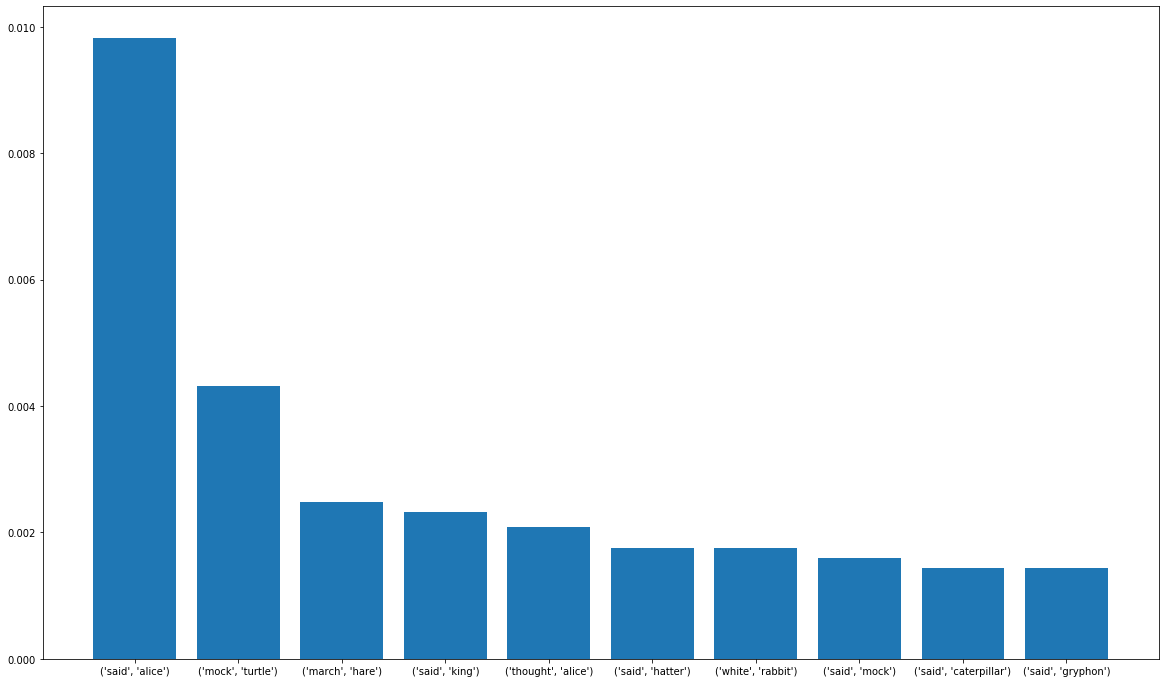

In [58]:
plt.figure(figsize=(20,12))
plt.bar(range(len(alice_top_10)), [val[1] for val in alice_top_10], align='center')
plt.xticks(range(len(alice_top_10)), [val[0] for val in alice_top_10])

([<matplotlib.axis.XTick at 0x7fd87eda8470>,
 <a list of 10 Text xticklabel objects>)

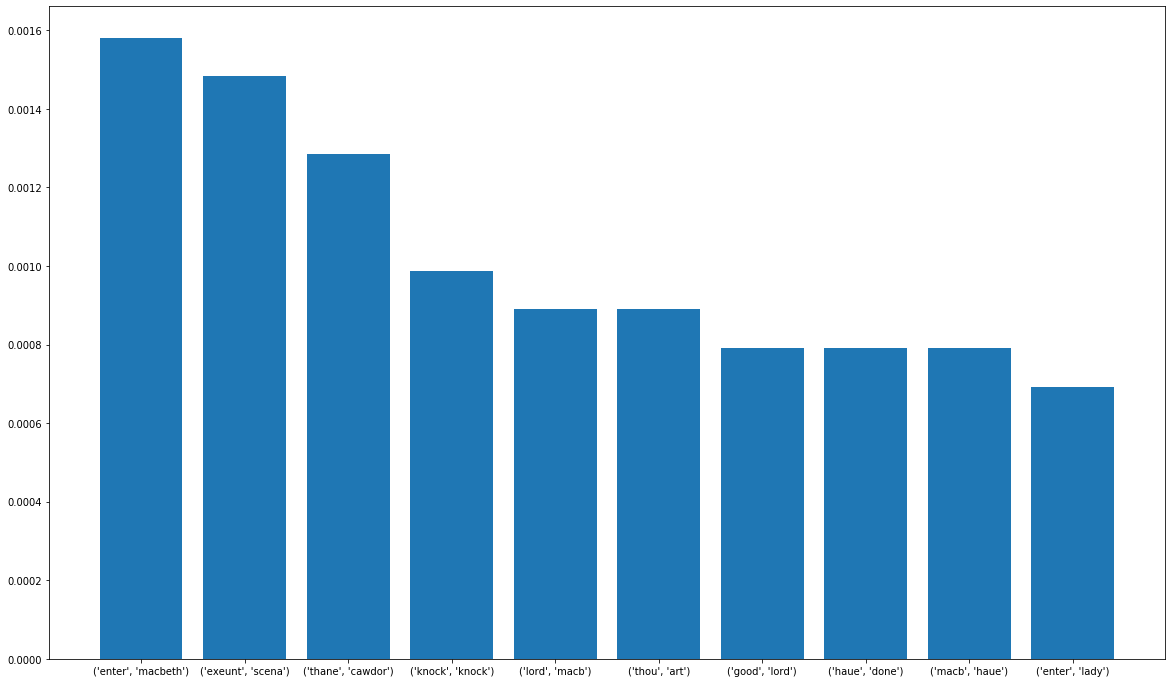

In [60]:
macbeth_top_10 = macbeth_scored[:10]
plt.figure(figsize=(20,12))
plt.bar(range(len(macbeth_top_10)), [val[1] for val in macbeth_top_10], align='center')
plt.xticks(range(len(macbeth_top_10)), [val[0] for val in macbeth_top_10])

## Summary

In this lab, we used our newfound NLP skills to generate some statistics specific to text data, and used them to compare two different works! 